Step 1: Reading the data Reading the data with python


In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
NetflixData=pd.read_csv('/content/drive/MyDrive/Data/NFLX.csv', encoding='latin')
print('Shape before deleting duplicate values:', NetflixData.shape)
# Removing duplicate rows if any
NetflixData=NetflixData.drop_duplicates()
print('Shape After deleting duplicate values:', NetflixData.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
NetflixData.head(10)

Shape before deleting duplicate values: (1009, 7)
Shape After deleting duplicate values: (1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2 : Problem Statement Denition

In [3]:
# Target Variable: MEDV Predictors/Features: Date, Open, High, Low, Close
# Look for patterns in opening and closing prices and predict future stock price trends
# Whether the stock price goes up for a month and then goes down for another month

Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.

In [4]:
#ML Regression model, as the target variable is Continuous.
NetflixData.nunique()# All the number are Continuous

,0
Date,1009
Open,976
High,983
Low,989
Close,988
Adj Close,988
Volume,1005


Step 4: Looking at the class distribution Target variable distribution to check if the data is balanced or skewed

<Axes: >

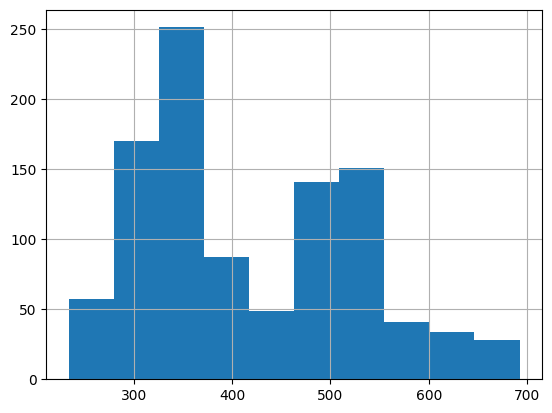

In [5]:
%matplotlib inline
NetflixData['Open'].hist()


Step 5: Basic Exploratory Data Analysis

In [6]:
# Looking at sample rows in the data
NetflixData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
# Looking at sample rows in the data
NetflixData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [8]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
NetflixData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
# Looking at the descriptive statistics of the data
NetflixData.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


Step 7: Removing Unwanted columns

In [10]:
NetflixData.drop(columns= ['Adj Close','Volume'])

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using
histograms

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

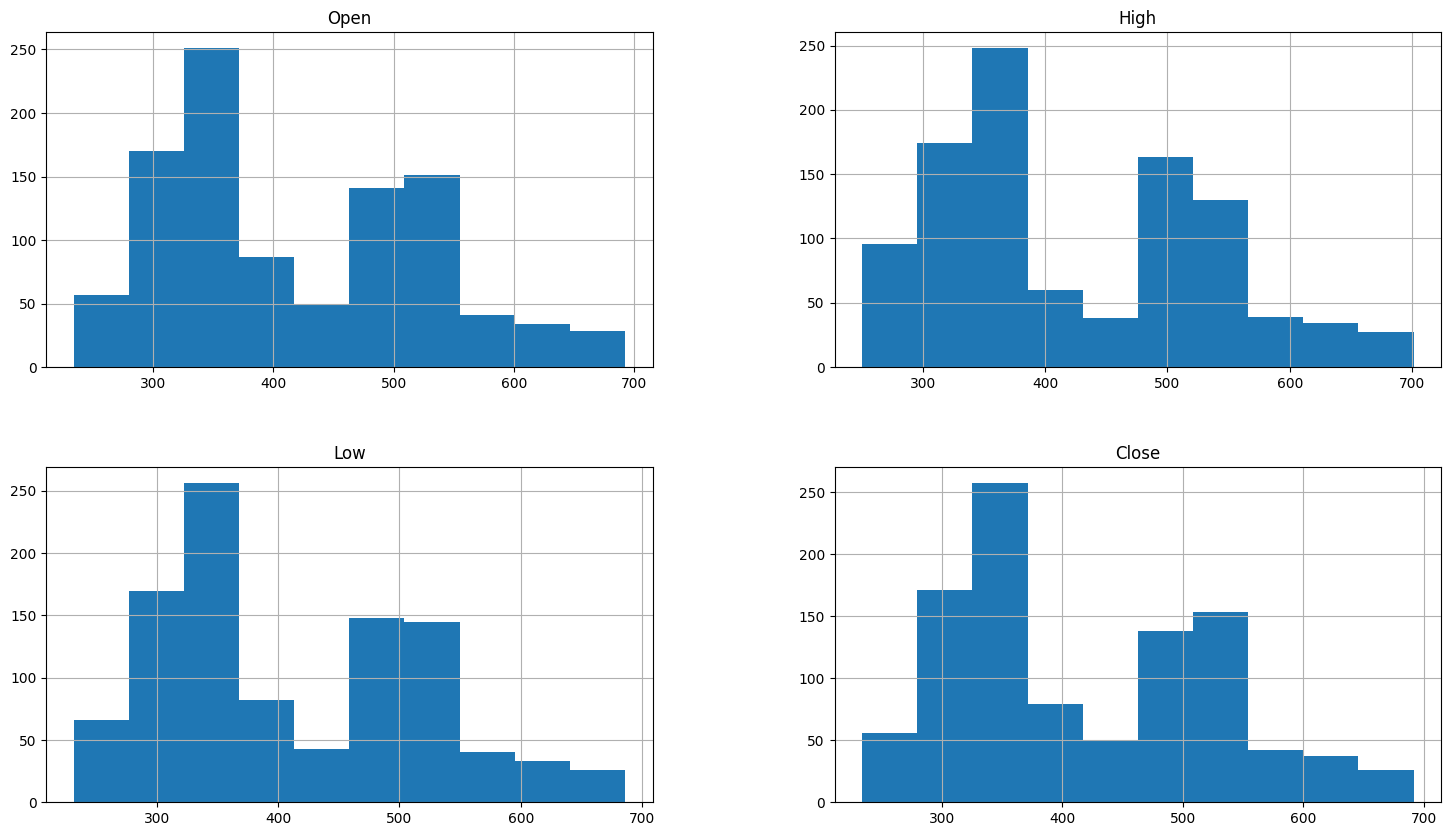

In [11]:
# Plotting histograms of multiple columns together
NetflixData.hist(['Date', 'Open', 'High', 'Low', 'Close'], figsize=(18,10))


Step 10: Outlier Analysis


In [12]:

NetflixData['Open'][NetflixData['Open']<300].sort_values(ascending=False)

,Open
384,299.500000
385,298.859985
395,298.779999
389,298.649994
468,298.500000
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


In [13]:

NetflixData['Open'][NetflixData['Open']<350].sort_values(ascending=False)

,Open
77,349.899994
237,349.600006
239,349.500000
498,349.000000
319,348.709991
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


334-131 = 203

In [14]:
NetflixData['Open'][NetflixData['Open']<400].sort_values(ascending=False)

,Open
561,399.529999
103,399.489990
101,399.190002
111,398.980011
550,397.500000
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


547-334 =213

In [15]:
NetflixData['Open'][NetflixData['Open']<450].sort_values(ascending=False)

,Open
597,449.119995
596,448.730011
577,448.559998
1006,448.250000
603,445.230011
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


607 - 547 = 60

In [16]:
NetflixData['Open'][NetflixData['Open']<500].sort_values(ascending=False)

,Open
658,499.989990
836,499.820007
628,498.649994
609,498.579987
850,498.540009
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


712-547 = 165

In [17]:
NetflixData['Open'][NetflixData['Open']<550].sort_values(ascending=False)

,Open
680,549.500000
989,549.460022
764,549.000000
676,548.809998
765,548.000000
...,...
5,252.139999
225,250.110001
1,247.699997
223,242.000000


In [18]:
NetflixData['Open'][NetflixData['Open']<250].sort_values(ascending=False)

,Open
1,247.699997
223,242.000000
224,233.919998



Step 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'Open'}>]], dtype=object)

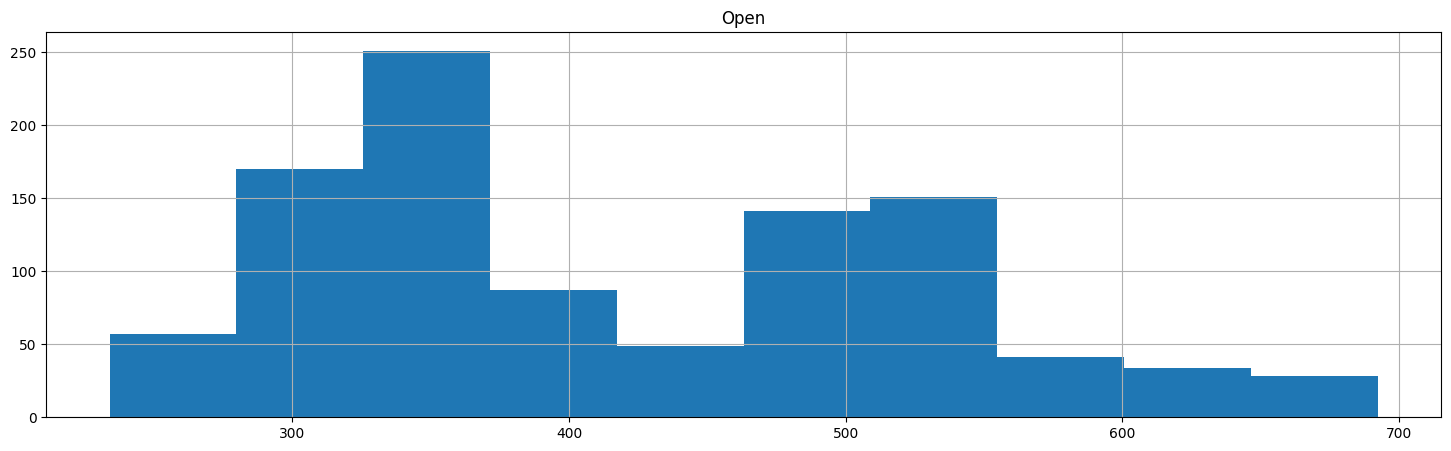

In [19]:
NetflixData.hist(['Open'], figsize=(18,5))

Step 12: Missing Values Analysis

In [20]:
# Finding how many missing values are there for each column
NetflixData.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Group BY Monthly

In [21]:
# strack overflow (2017) group by week in pandas.https://stackoverflow.com/questions/45281297/group-by-week-in-pandas
# Check if 'Date' column exists in the DataFrame
if 'Date' in NetflixData.columns:
    # Convert the 'Date' column to datetime objects if it's not already
    NetflixData['Date'] = pd.to_datetime(NetflixData['Date'])

    # Set 'Date' as the index
    NetflixData.set_index('Date', inplace=True)

    # Resample the data weekly and calculate the mean of 'Open' for each week
    Monthly_data = NetflixData[['Open','High','Low','Close']].resample('M').mean()

    print(Monthly_data)

else:
    print("Error: 'Date'.")

                  Open        High         Low       Close
Date                                                      
2018-02-28  271.598823  277.357647  266.475293  272.054705
2018-03-31  312.712859  317.424284  305.397143  312.228097
2018-04-30  309.129524  313.808098  302.023807  307.466192
2018-05-31  329.779541  333.969094  327.000000  331.536819
2018-06-30  384.557143  389.790475  378.141427  384.133336
2018-07-31  380.969526  387.179047  374.233330  381.515238
2018-08-31  345.410001  351.161738  340.845217  346.257824
2018-09-30  363.326843  369.201578  356.709998  362.641576
2018-10-31  340.025218  346.519998  328.360431  335.445652
2018-11-30  290.643335  297.460474  282.389999  290.344764
2018-12-31  266.309474  273.846315  258.560000  265.302630
2019-01-31  323.402383  330.171427  318.293809  325.814287
2019-02-28  354.656316  360.118423  350.891049  355.607896
2019-03-31  359.947619  364.034287  354.490476  359.435712
2019-04-30  365.655715  370.220952  360.902380  366.1457

Insert to dataframe

Step 13: Feature Selection (Attribute Selection)


In [22]:
#Continuous Vs Continuous ---- Scatter Plot


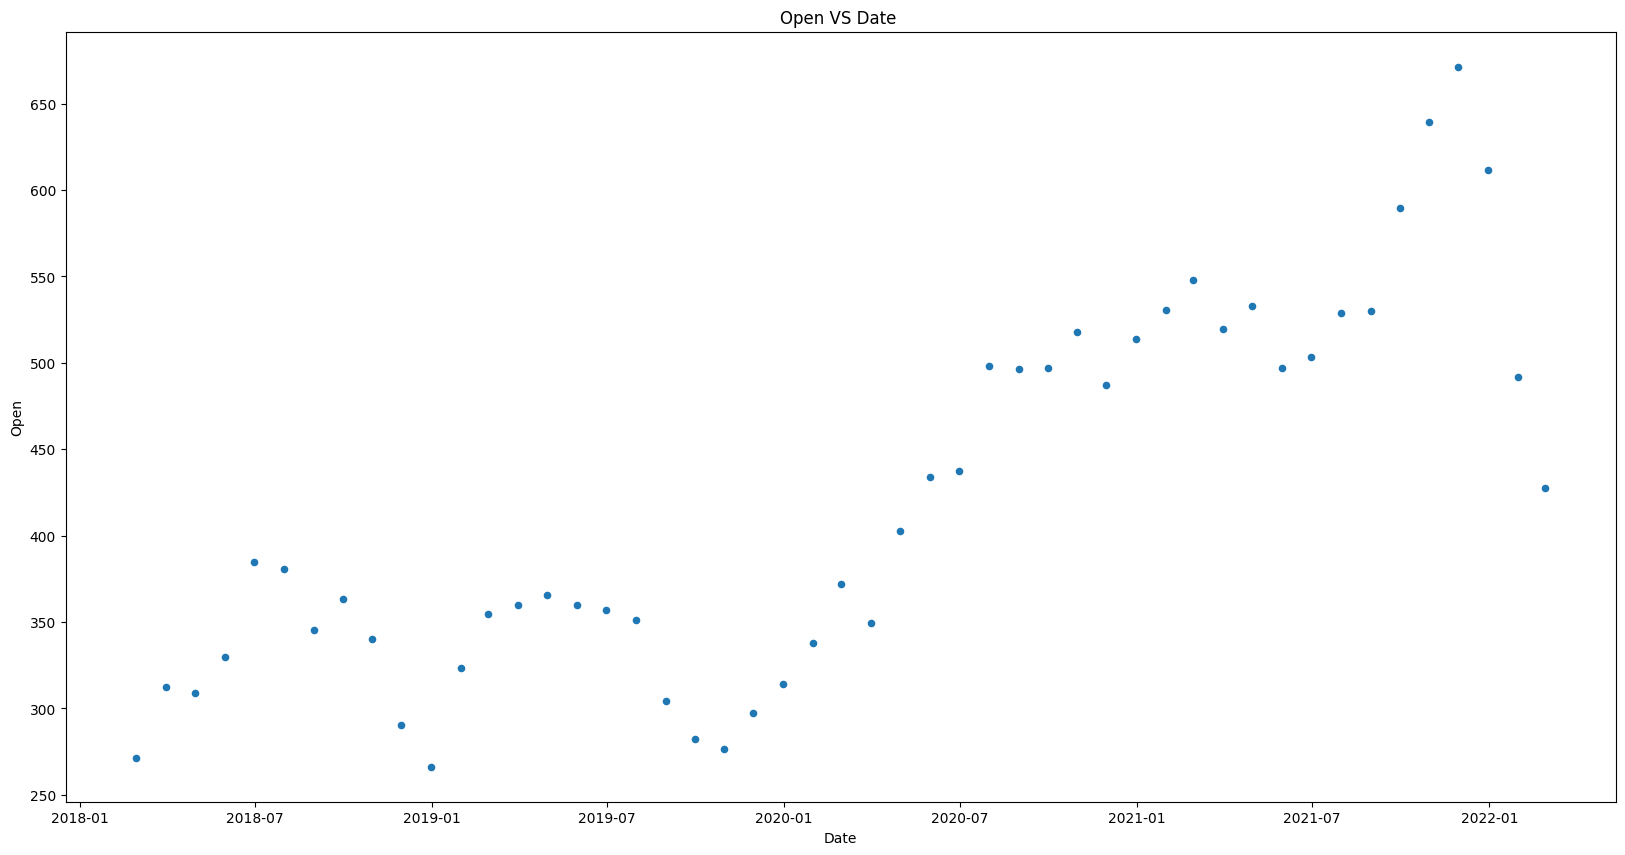

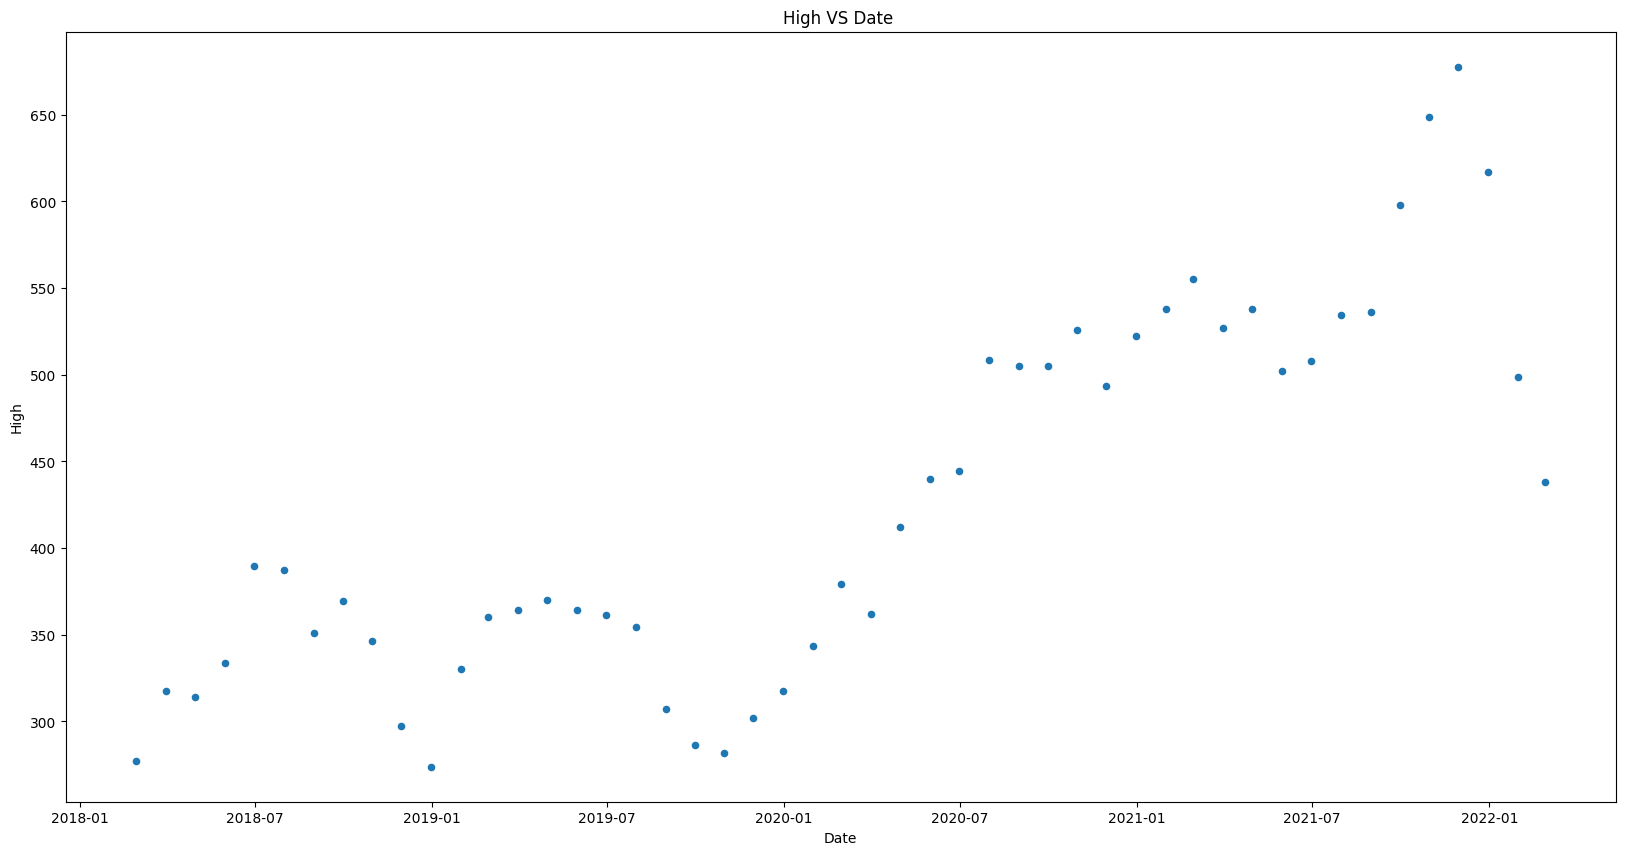

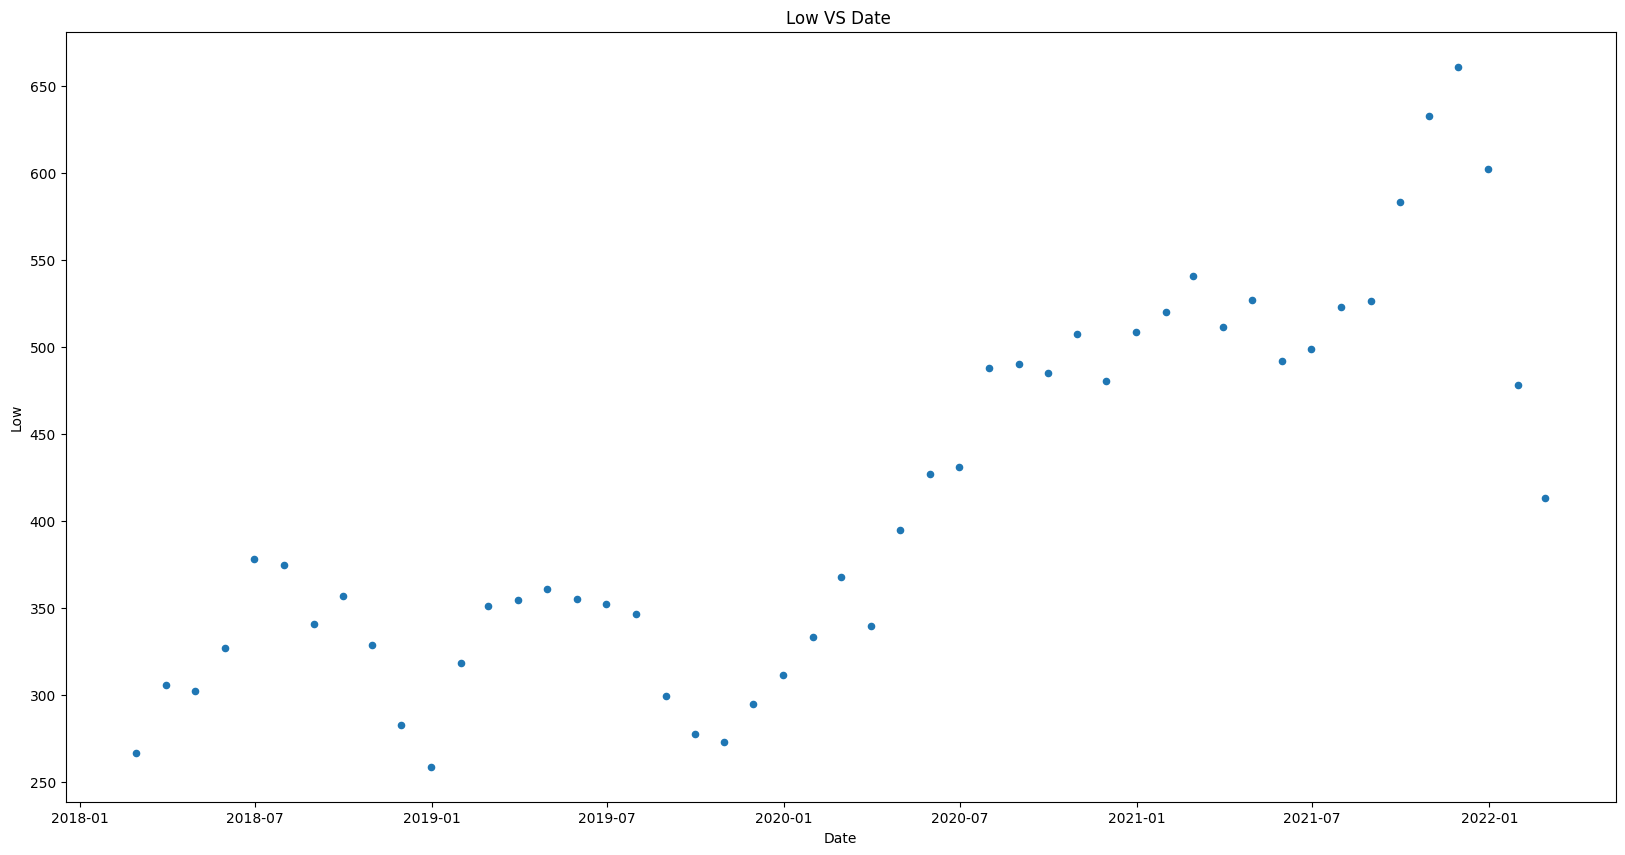

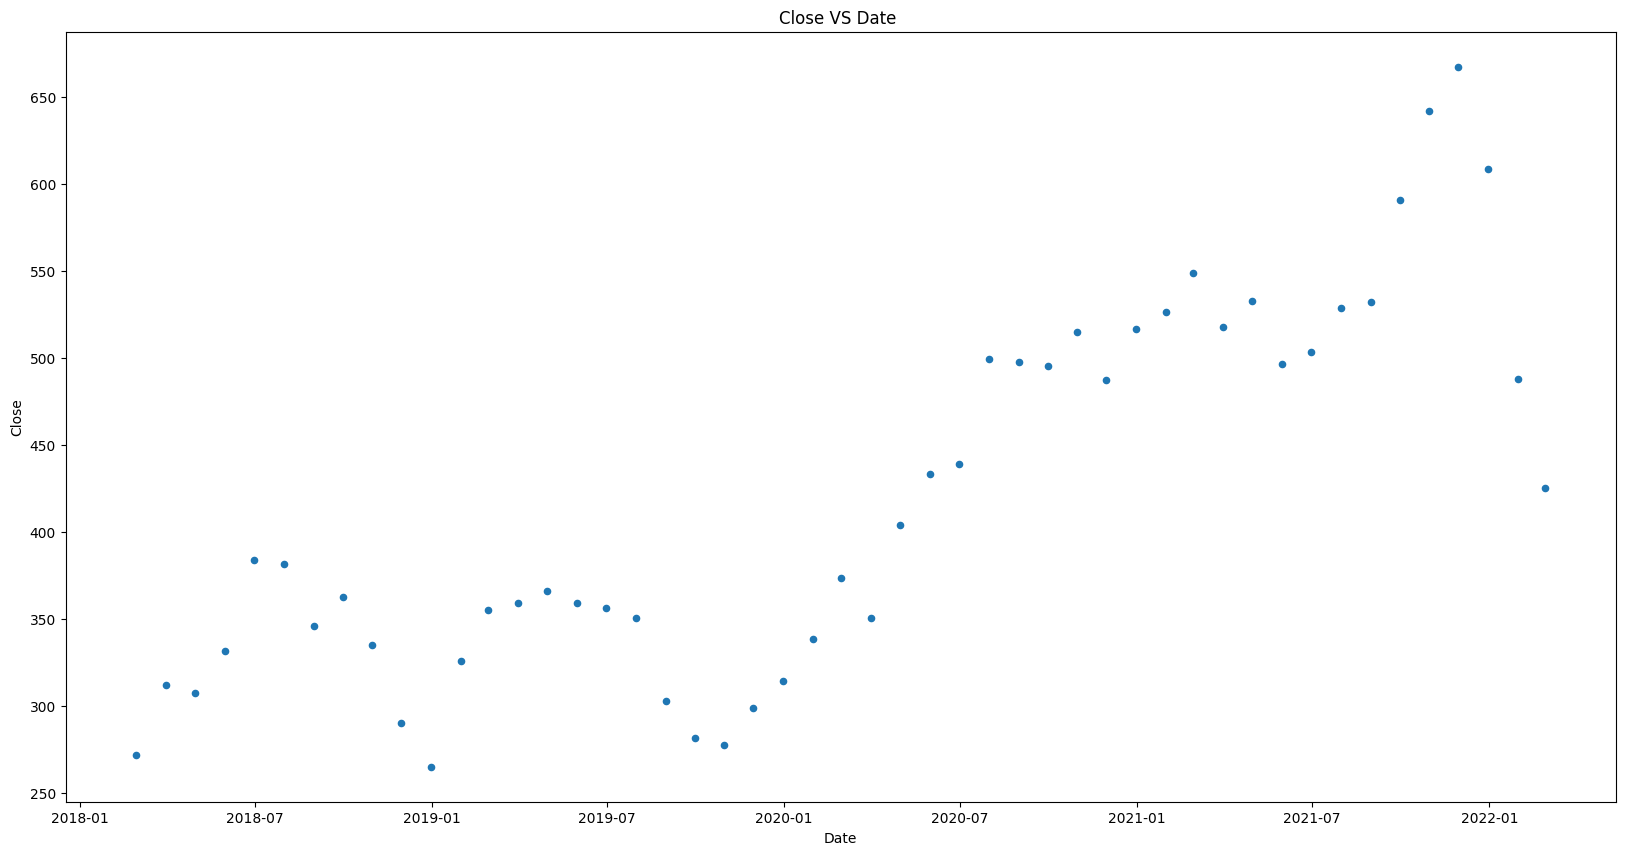

In [23]:
#Continuous Vs Continuous ---- Scatter Plot
ContinuousCols=['Open','High', 'Low', 'Close']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  Monthly_data.reset_index().plot.scatter(x='Date', y= predictor, figsize=(20,10), title=predictor +' VS'+" Date ") # Reset index to make 'Date' a column

Selecting final Predictors/Features for building Machine Learning/AI model

In [24]:
SelectedColumns=['Open','High', 'Low', 'Close']

# Selecting final columns
DataForML=NetflixData[SelectedColumns]
DataForML.head()

,Open,High,Low,Close
Date,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995
2018-02-06,247.699997,266.700012,245.000000,265.720001
2018-02-07,266.579987,272.450012,264.329987,264.559998
2018-02-08,267.079987,267.619995,250.000000,250.100006
2018-02-09,253.850006,255.800003,236.110001,249.470001


In [25]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [26]:
# Calculating correlation matrix
ContinuousCols=['Open', 'High', 'Low', 'Close']
# Creating the correlation matrix
CorrelationData=NetflixData[ContinuousCols].corr()
CorrelationData

,Open,High,Low,Close
Open,1.000000,0.998605,0.998508,0.996812
High,0.998605,1.000000,0.998203,0.998551
Low,0.998508,0.998203,1.000000,0.998544
Close,0.996812,0.998551,0.998544,1.000000


Step 17: Data Pre-processing for Machine Learning Model Building or Model Development

In [27]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(NetflixData)
# Adding Target Variable to the data
DataForML_Numeric['Open']=NetflixData['Open']
# Printing sample rows
DataForML_Numeric.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Step 18: Machine Learning Model Development

In [28]:
import pandas as pd
# Printing all the column names for our reference
DataForML_Numeric.columns
pd.Index(['Date','Open', 'High', 'Low','Close'], dtype='object')
#Separate Target Variable and Predictor Variables
TargetVariable='Open'
Predictors=['Open', 'High', 'Low','Close']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


Step 19: Standardization/Normalization of data

In [29]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(706, 4)
(706,)
(303, 4)
(303,)


Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [30]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])
MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
#print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          499.0
1  505.450012  0.572101  0.561601  0.569778          505.0
2  507.350006  0.585891  0.589962  0.583168          507.0
3  385.329987  0.303482  0.322451  0.319325          385.0
4  323.399994  0.166985  0.182474  0.177410          323.0
Mean Accuracy on test data: 99.93960423935164
Median Accuracy on test data: 99.94378527072912

Accuracy values for 10-fold Cross Validation:
 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.989451916670768

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          486.0
1  505.450012  0.572101  0.561601  0.569778          492.0
2  507.350006  0.585891  0.589962  0.583168          504.0
3  385.329987  0.303482  0.322451  0.319325          365.0
4  323.399994  0.166985  0.182474  0.177410          315.0
Mean Accuracy on test data: 97.66471232253694
Median Accuracy on test data: 97.48350833639932


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [97.29727762 97.14865413 96.74237379 97.22655237 96.51010553 95.17734061
 99.08100322 97.44090289 97.78141125 93.21357853]

Final Average Accuracy of the model: 96.76


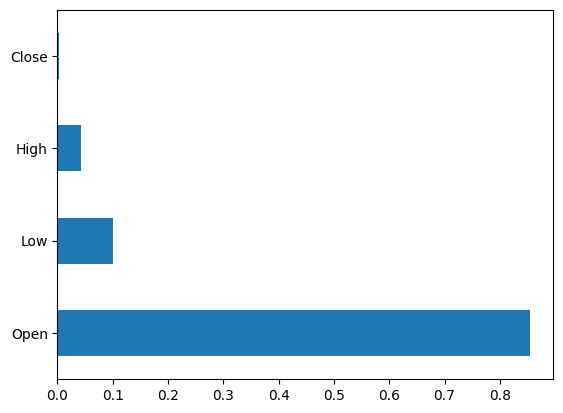

In [31]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBoost Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9986985140188104

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          501.0
1  505.450012  0.572101  0.561601  0.569778          501.0
2  507.350006  0.585891  0.589962  0.583168          501.0
3  385.329987  0.303482  0.322451  0.319325          388.0
4  323.399994  0.166985  0.182474  0.177410          327.0
Mean Accuracy on test data: 99.15128081757766
Median Accuracy on test data: 99.19274045899193

Accuracy values for 10-fold Cross Validation:
 [99.05964691 99.06792219 98.89765001 99.17910166 99.06920688 97.91208123
 99.04467708 99.32074727 99.33267518 95.77464665]

Final Average Accuracy of the model: 98.67


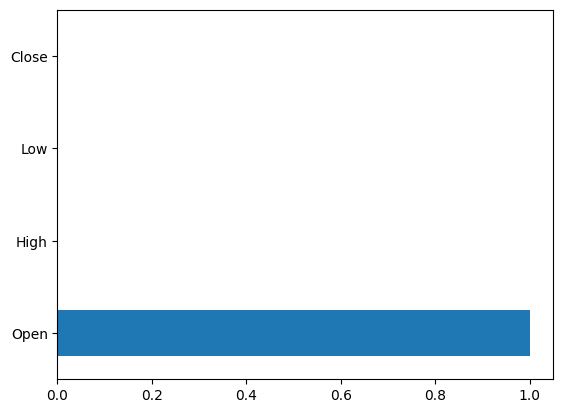

In [32]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date'] = 100 * (abs(
    TestingDataResults['Open'] - TestingDataResults['PredictedOpen']) / TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting/Visualising the Decision Tree

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:09] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.9999621924145955

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          498.0
1  505.450012  0.572101  0.561601  0.569778          505.0
2  507.350006  0.585891  0.589962  0.583168          507.0
3  385.329987  0.303482  0.322451  0.319325          384.0
4  323.399994  0.166985  0.182474  0.177410          324.0
Mean Accuracy on test data: 99.74137172463698
Median Accuracy on test data: 99.80793044181596


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:10] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:12] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [99.61842732 99.77001357 99.66900267 99.81734135 99.75347779 99.15140276
 99.6610286  99.77959852 99.77237736 95.9226203 ]

Final Average Accuracy of the model: 99.29


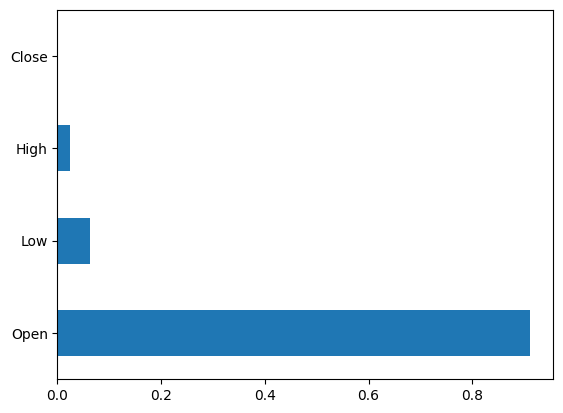

In [33]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction) # TargetVariable is 'Open'

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['Predicted'+ TargetVariable]))/TestingDataResults['Open']) # Use 'Predicted'+ TargetVariable to access the correct column


MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.988887079646757

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          488.0
1  505.450012  0.572101  0.561601  0.569778          492.0
2  507.350006  0.585891  0.589962  0.583168          494.0
3  385.329987  0.303482  0.322451  0.319325          366.0
4  323.399994  0.166985  0.182474  0.177410          314.0
Mean Accuracy on test data: 97.62338781087122
Median Accuracy on test data: 97.50954560677523


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [97.33130823 97.13778813 96.76948663 97.15676409 96.36166982 95.1694661
 98.92000292 97.26249225 97.82345724 92.43702574]

Final Average Accuracy of the model: 96.64


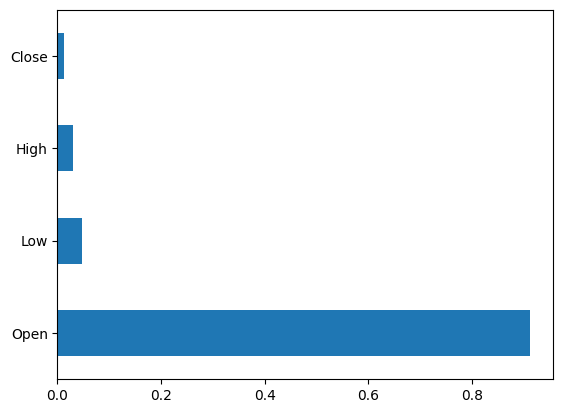

In [34]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [35]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9997087027311979

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          502.0
1  505.450012  0.572101  0.561601  0.569778          504.0
2  507.350006  0.585891  0.589962  0.583168          510.0
3  385.329987  0.303482  0.322451  0.319325          382.0
4  323.399994  0.166985  0.182474  0.177410          321.0
Mean Accuracy on test data: 99.54274229213779
Median Accuracy on test data: 99.66777080794148

Accuracy values for 10-fold Cross Validation:
 [99.51183312 99.46636421 99.47673189 99.71817346 99.57758607 99.08792175
 99.48773046 99.60749993 99.66184196 95.9707975 ]

Final Average Accuracy of the model: 99.16


Support Vector Machine (SVM) Regressor

In [36]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['Date']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['Date'])
MedianMAPE=np.median(TestingDataResults['Date'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9965587241227262

##### Model Validation and Accuracy Calculations ##########
         Open      High       Low     Close  PredictedOpen
0  498.649994  0.576875  0.587917  0.602346          501.0
1  505.450012  0.572101  0.561601  0.569778          496.0
2  507.350006  0.585891  0.589962  0.583168          502.0
3  385.329987  0.303482  0.322451  0.319325          384.0
4  323.399994  0.166985  0.182474  0.177410          323.0
Mean Accuracy on test data: 98.7816497998258
Median Accuracy on test data: 99.00154908557172

Accuracy values for 10-fold Cross Validation:
 [98.7164028  98.83724682 98.75025422 99.1988246  98.54526102 98.99932881
 98.96060804 99.07548584 99.20541128 98.08760792]

Final Average Accuracy of the model: 98.84


Step 21: Model Deployment

In [37]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Open','High','Low' ]

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors='Close'

X = DataForML_Numeric[Predictors].values.reshape(-1, 1)
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1009, 1)
(1009, 3)


Cross validating the final model accuracy with less predictors

In [38]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:22] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:23] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:24] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:25] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [98.45148943 98.34687953 98.38648824 98.78303534 98.51732022 97.85667376
 97.9604124  98.70599346 98.98374642 95.36761554]

Final Average Accuracy of the model: 98.14


Step 22: Retraining the final model using 100% data

In [39]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

Step 23: Save the model as a serialized file which can be stored anywhere

In [40]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content
